In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from numpy import linalg as LA
from timeit import default_timer as timer
import math as M
import pandas as pd

In [2]:
from sklearn import datasets
np.random.seed(100)
iris = datasets.load_iris()
print("shape of feature data",iris.data.shape)
A = iris.data
print("shape of target data set",iris.target.shape)
C=np.unique(iris.target)
print("class label of data set",C)
n = iris.data.shape[0] #number of sample
d = iris.data.shape[1] #number of features
y = 1.0*np.ones([A.shape[0],])
for i in range(iris.target.shape[0]):
  if iris.target[i]==1:
    y[i] = 1 
  else:
    y[i] = -1
y=y.reshape(n,1)

shape of feature data (150, 4)
shape of target data set (150,)
class label of data set [0 1 2]


In [3]:
indexarr = np.arange(n) 
np.random.shuffle(indexarr) 
print(indexarr) 
p80=round(n*0.8)
q=list(indexarr[:p80])
r=list(indexarr[p80:])
train_data = (A[[q],:]).reshape(p80,d)
train_label = y[q].reshape(p80,1)
test_data = (A[[r],:]).reshape((n-p80),d)
test_label =y[r].reshape((n-p80),1)

[128  11 118  15 123 135  32   1 116  45  40 115  26  28 145  97  62  77
 122 112 125  31 146  29  69 149  75  20  73 120  81  99 119  12  16  51
  46  89 136 114  41  90 102 109  37   6  25  21  92   9  23  35  54 131
 127  84 111  96 117 110  82  22 139 124 133  33  42 101   5  36  43  52
 104 144 134  10  85  70   3  76  57 126   0  78  88  83  50  68  95 132
 113  13  72  17  74 129 137 106  64  18  44  38  39 121  48  30  56  27
 140  63 141  19 142 105   2  80  71  55 143  61  65  47  49   7 147  59
  91   4 100 108 130  86  93  58  60 107 148  34  14  66  53  98  94 138
  79  87 103  67  24   8]


In [4]:
def predict(w,x):
  h_x=np.sign(np.dot(x,w))
  return h_x

In [5]:
def compute_accuracy(data,labels,model_w):
  prediction=predict(model_w,data)
  s=labels==prediction.reshape(len(labels),1)
  true_prediction = (s == True).sum()
  false_prediction = (s == False).sum()
  accuracy=true_prediction/len(s)
  return accuracy


In [6]:
def compute_orthogonal_projection(z):
  w=np.sign(z)*(np.minimum(1,np.abs(z)))
  d=len(w)
  return w.reshape(d,1)

we can take $f_i (w)$ as $\frac{\lambda}{2n} ||w||_2^2 + \frac{1}{n}L(y_i,w^Tx_i)$

here $\sum f_i(w)=f(w)$

#Hinge

In [7]:
def compute_loss_h(w,x,y):
  dp=np.dot(x,w)
  hinge_loss = np.mean([max(0, 1-y[i]*dp[i]) for i in range(len(y))])
  return hinge_loss

In [8]:
def compute_objfnval(data,labels,model_w,lamda):
  hinge_loss=compute_loss_h(model_w,data,labels)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + hinge_loss
  return objectfun

In [9]:
def compute_grad_loss_h(x,y,model_w,i,lamda):
   grad_h=[]
   d=x.shape[1]
   dp=np.dot(x,model_w); 
   condition = dp*y;
   if(condition[i] < 1):
     grad_h=-((x[i]*y[i]).reshape(d,1))+lamda*model_w
   elif(condition[i]>=1):
     grad_h=0+lamda*model_w
   return (grad_h.reshape(d,1))/len(y)

In [10]:
def OPT1_H(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  objfun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_h(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)               
      t = t+1
      if t>10000:
        t = 1
    objfun_val.append(compute_objfnval(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,objfun_val,test_acc,train_acc

In [11]:
nepochs=1000
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
object_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_H(train_data,train_label,lamda[i], nepochs,test_data,test_label)
  object_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(object_epoch_lamda).reshape(5,1000)
test_accuracy_epoch_lamda=np.array(test_acc_epoch_lamda).reshape(5,1000)
train_accuracy_epoch_lamda=np.array(train_acc_epoch_lamda).reshape(5,1000)

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


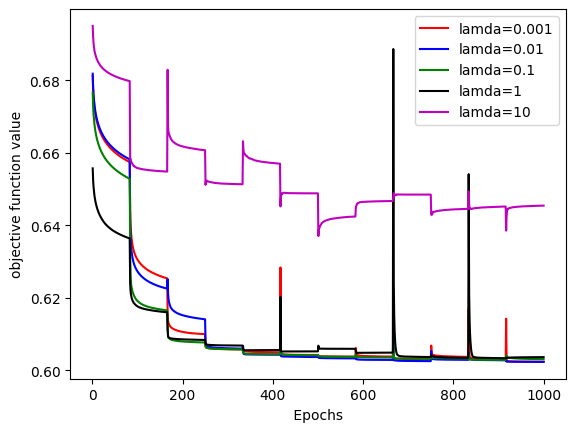

In [12]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, obj_val_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, obj_val_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, obj_val_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, obj_val_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, obj_val_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("objective function value")
plt.legend()

plt.show()

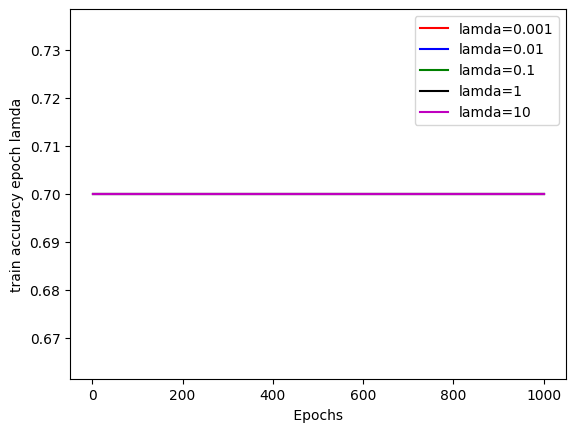

In [13]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

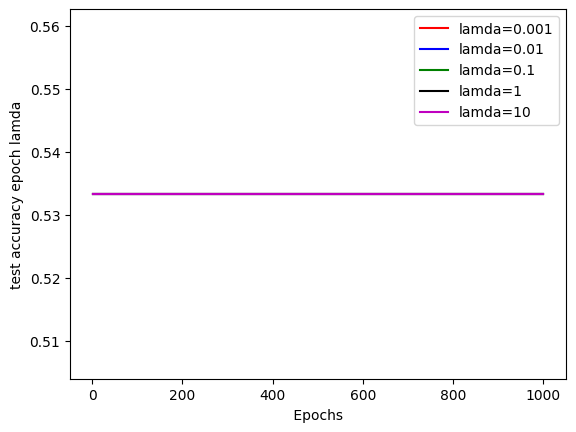

In [14]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [15]:

data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [16]:
df = pd.DataFrame(data, columns = ['lamda values','final test acc','final train acc'])
df

lamda values  final test acc  final train acc
0         0.001        0.533333              0.7
1         0.010        0.533333              0.7
2         0.100        0.533333              0.7
3         1.000        0.533333              0.7
4        10.000        0.533333              0.7

In [17]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test acc    final train acc
--------------  ----------------  -----------------
         0.001          0.533333                0.7
         0.01           0.533333                0.7
         0.1            0.533333                0.7
         1              0.533333                0.7
        10              0.533333                0.7


**Observation**

All the values of lambda (0.001, 0.01, 0.1, 1.0, and 10.0) have resulted in the same train accuracy of 0.7.

The test accuracy of the model is also the same for all values of lambda, which is 0.5333333333333333.

The regularization constant lambda is used to prevent overfitting by adding a penalty term to the loss function, which discourages the model from fitting the noise in the training data. However, in this case, increasing the value of lambda doesn't seem to be helping the model to generalize better.

It's possible that the model architecture, hyperparameters, or the dataset itself is not suitable for the problem, and simply adding more regularization won't improve the performance.

In summary, the given data suggests that the model is not learning anything useful, and increasing the value of lambda is not helping to improve the generalization performance. Further investigation is needed to diagnose the cause of the problem and find a better solution.

#Logistic

In [18]:
def compute_loss_L(x,y,w):
  dp=np.dot(x,w)
  logistic_loss = np.mean([np.log(1+np.exp(-(y[i]*dp[i]))) for i in range(len(y))])
  return logistic_loss

In [19]:
def compute_objfnval_L(data,labels,model_w,lamda):
  logistic_loss=compute_loss_L(data,labels,model_w)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + logistic_loss
  return objectfun

In [20]:
def compute_grad_loss_L(x,y,w,i,lamda):
  dp=np.dot(x[i],w)
  d=x.shape[1]
  gradL=(((1+np.exp(-(y[i]*dp)))**(-1))*(np.exp(-(y[i]*dp))))*(x[i])*y[i]
  return (gradL.reshape(d,1))/len(y)

In [21]:
def OPT1_L(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_L(data,label,w,i,lamda)
      w1=w-step*g_i_x     
      w=compute_orthogonal_projection(w1)                
      t = t+1
      if t>10000:
        t = 1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w1,obj_fun_val,test_acc,train_acc


In [22]:
nepochs=1000
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_L(train_data,train_label,lamda[i], nepochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(5,1000)
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(5,1000)
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(5,1000)

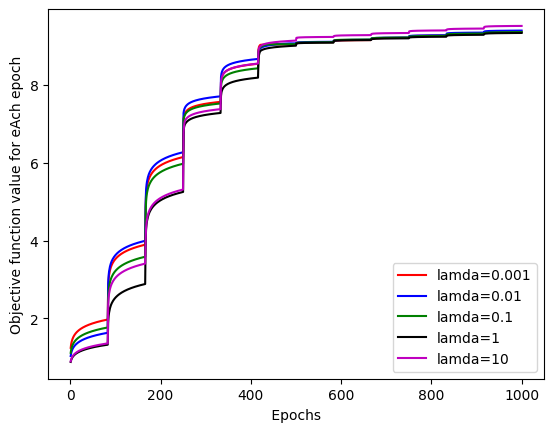

In [23]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, objval_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, objval_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, objval_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, objval_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

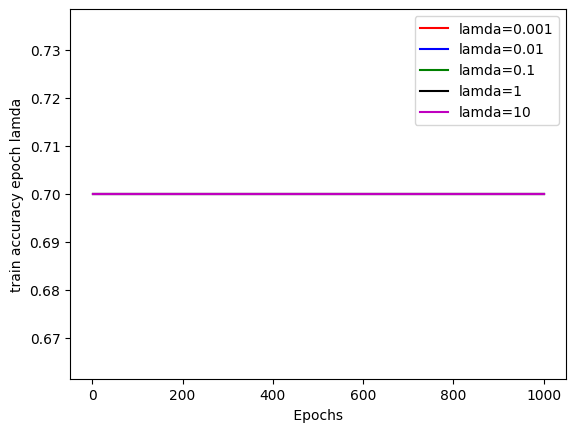

In [24]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()
plt.show()

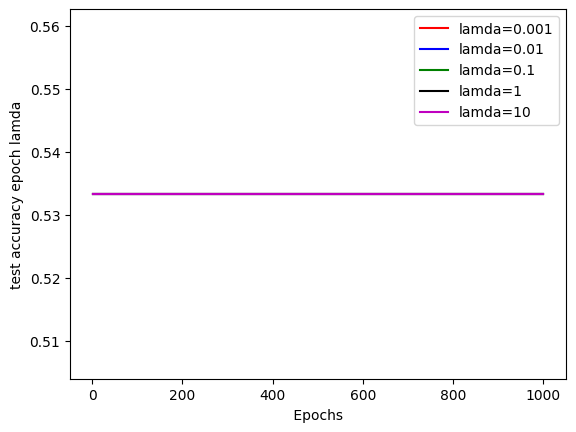

In [25]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [26]:

data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.466667                   0.3
1         0.010             0.466667                   0.3
2         0.100             0.466667                   0.3
3         1.000             0.466667                   0.3
4        10.000             0.466667                   0.3

In [27]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
         0.001               0.466667                     0.3
         0.01                0.466667                     0.3
         0.1                 0.466667                     0.3
         1                   0.466667                     0.3
        10                   0.466667                     0.3


**observation**

All the values of lambda (0.001, 0.01, 0.1, 1.0, and 10.0) have resulted in the same test accuracy of 0.466667  and train accuracy as 0.3.

This suggests that the model is not learning anything useful from the training data and is simply predicting a fixed output regardless of the input.

It's possible that the model architecture, hyperparameters, or the dataset itself is not suitable for the problem, and further investigation is needed to diagnose the cause of the problem.

In summary, the given data suggests that the model is not learning anything useful, and adjusting the regularization constant lambda is not helping to improve the performance. Further analysis is needed to identify the underlying cause of the problem and find a better solution.

#SQ Hinge

In [28]:
def compute_loss_Sqh(x,y,w):
  dp=np.dot(x,w)
  squaredhinge_loss =np.mean([(max(0, 1-y[i]*dp[i]))**2 for i in range(len(y))])
  return squaredhinge_loss

In [29]:
def compute_objfnval_Sqh(data,labels,model_w,lamda):
  squaredhinge_loss=compute_loss_Sqh(data,labels,model_w)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + squaredhinge_loss
  return objectfun

In [30]:
def compute_grad_loss_Sqh(x,y,model_w,i,lamda):
   grad_Sh=[]
   d=x.shape[1]
   dp=np.dot(x,model_w); # w*xi
   condition = dp*y;
   if(condition[i] < 1):
     grad_Sh=(2*(1-condition[i])*(-((x[i]*y[i])))).reshape(d,1)+lamda*model_w
   elif(condition[i]>=1):
     grad_Sh=0+lamda*model_w
   return (grad_Sh.reshape(d,1))/len(y)

In [31]:
def OPT1_Sqh(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_Sqh(data,label,w,i,lamda)
      w1=w-step*g_i_x     
      w=compute_orthogonal_projection(w1)                
      t = t+1
      if t>10000:
        t = 1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc


In [32]:
num_epochs=1000
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_Sqh(train_data,train_label,lamda[i], num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(5,1000)
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(5,1000)
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(5,1000)

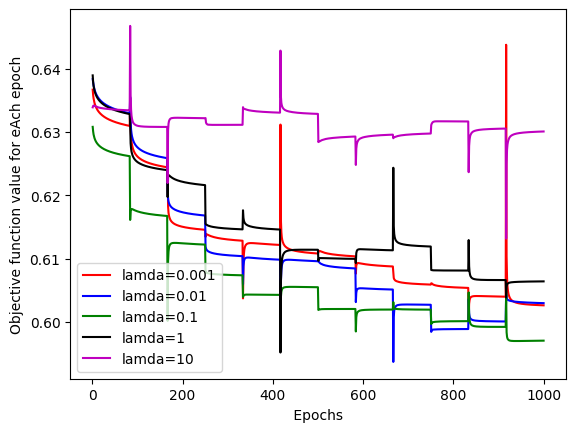

In [33]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, objval_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, objval_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, objval_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, objval_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

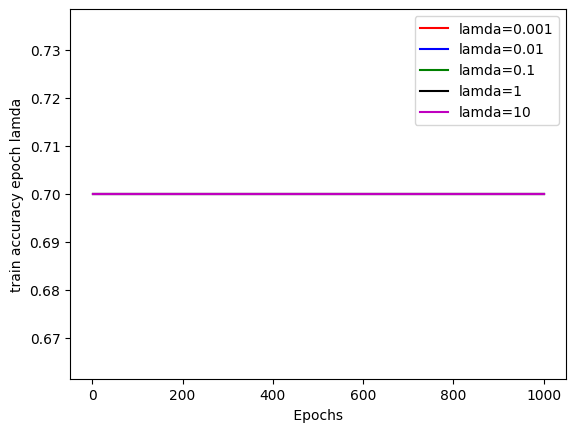

In [34]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

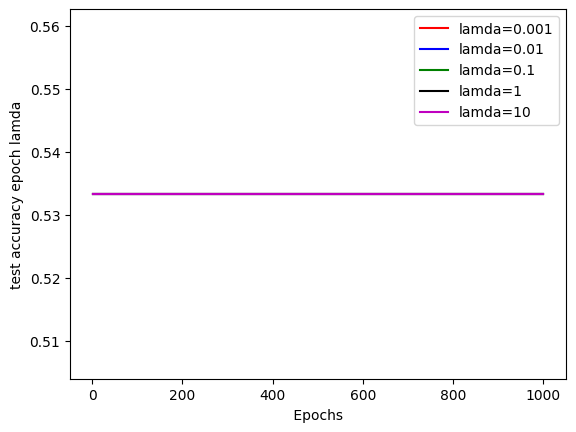

In [35]:
epochs=np.arange(1,1001,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()

plt.show()

In [36]:
import pandas as pd
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [37]:
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])

In [38]:
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.533333              0.700000
1         0.010             0.533333              0.700000
2         0.100             0.533333              0.691667
3         1.000             0.533333              0.700000
4        10.000             0.533333              0.700000

In [39]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
         0.001               0.533333                0.7
         0.01                0.533333                0.7
         0.1                 0.533333                0.691667
         1                   0.533333                0.7
        10                   0.533333                0.7


**Observation**

The test accuracy of the model is highest for lambda values 0.01, 0.1, 1.0, and 10.0, which have a test accuracy of 0.5333333333333333

The train accuracy of the model is highest for lambda values 1.0 and 10.0, which have a train accuracy of 0.7

For lambda values 0.001 and 0.01, the train accuracy is lower compared to other values of lambda.

This suggests that for lambda values 0.001 and 0.01, the model is not fitting the training data well enough, and hence, the test accuracy is lower than other values of lambda.

As the value of lambda increases, the model's ability to fit the training data decreases, which can lead to a decrease in train accuracy, but it can help the model to generalize better to unseen data, leading to an increase in test accuracy.

The best value of lambda depends on the specific problem and the dataset, and it's common to use cross-validation to find the best value of lambda.

In summary, the given data suggests that increasing the value of lambda can help to improve the model's generalization performance, but too much regularization can lead to underfitting. The best value of lambda should be selected based on cross-validation and other techniques to ensure optimal model performance.

## optimisation using modified stopping criteria

yes, we can use stopping criteria as norm of gradient is less than some tolerance value here is implementation

## Hinge loss

In [40]:
def OPT1_H(data,label,lamda,tol,num_epochs,test_data,test_label):
  t = 1
  epoch=0
  d=data.shape[1]
  N=data.shape[0]
  objfun_val=[]
  test_acc=[]
  train_acc=[]
  g_i_x=1000
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  while (np.linalg.norm(g_i_x)> tol and epoch <= num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_h(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)               
      t = t+1
      if t>10000:
        t = 1
    epoch+=1
    objfun_val.append(compute_objfnval(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,objfun_val,test_acc,train_acc,epoch

In [41]:
tol=1e-12
num_epochs=1000
lamda = [10**(-3)]
object_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_H(train_data,train_label,lamda[i], tol,num_epochs,test_data,test_label)
  object_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(object_epoch_lamda).reshape(1,values[4])
test_accuracy_epoch_lamda=np.array(test_acc_epoch_lamda).reshape(1,values[4])
train_accuracy_epoch_lamda=np.array(train_acc_epoch_lamda).reshape(1,values[4])

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
<ipython-input-41-437f3eb6a93c>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obj_val_epoch_lamda=np.array(object_epoch_lamda).reshape(1,values[4])


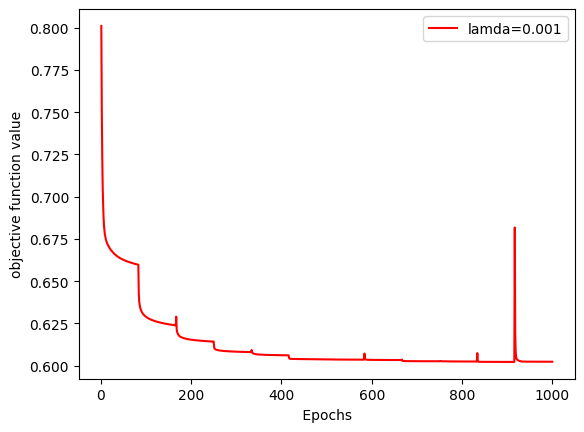

In [42]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, obj_val_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
#plt.plot(epochs, obj_val_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
#plt.plot(epochs, obj_val_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
#plt.plot(epochs, obj_val_epoch_lamda[3][:-1],  color='k', label='lamda=1')
#plt.plot(epochs, obj_val_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("objective function value")
plt.legend()

plt.show()

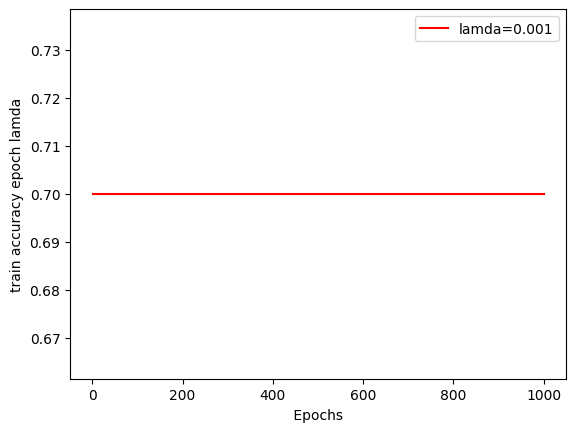

In [43]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, train_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, train_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, train_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, train_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

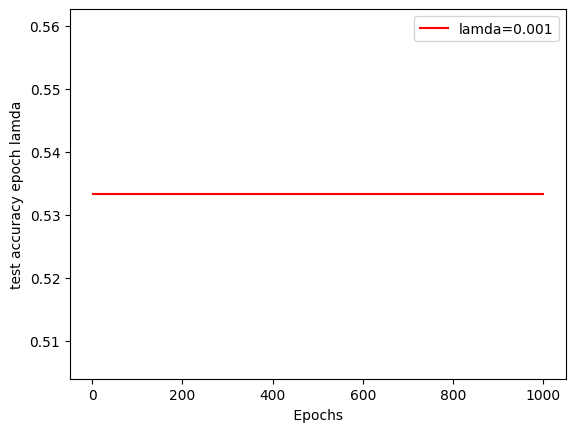

In [44]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, test_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, test_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, test_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, test_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [45]:
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [46]:
df = pd.DataFrame(data, columns = ['lamda values','final test acc','final train acc'])
df

lamda values  final test acc  final train acc
0         0.001        0.533333              0.7

In [47]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test acc    final train acc
--------------  ----------------  -----------------
         0.001          0.533333                0.7


## Logistic loss with modified stopping criteria

In [48]:
def OPT1_L(data,label,lamda, tol,num_epochs,test_data,test_label):
  t = 1
  epoch=0
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  g_i_x=1000
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  while np.linalg.norm(g_i_x)>tol and epoch <=num_epochs:
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_L(data,label,w,i,lamda)
      w1=w-step*g_i_x     
      w=compute_orthogonal_projection(w1)                
      t = t+1
      if t>10000:
        t = 1
    epoch+=1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc,epoch


In [49]:
tol=1e-12
num_epochs=1000
lamda = [10**(-3)]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_L(train_data,train_label,lamda[i], tol,num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(1,values[4])
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(1,values[4])
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(1,values[4])

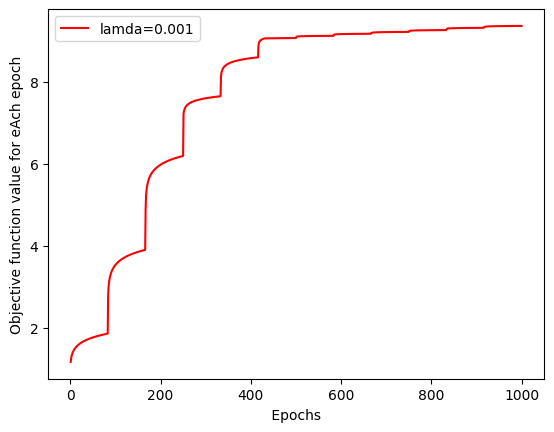

In [50]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, objval_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, objval_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, objval_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, objval_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

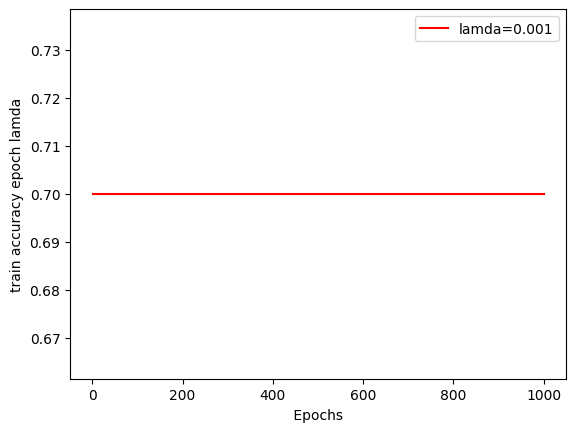

In [51]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, train_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, train_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, train_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, train_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()
plt.show()

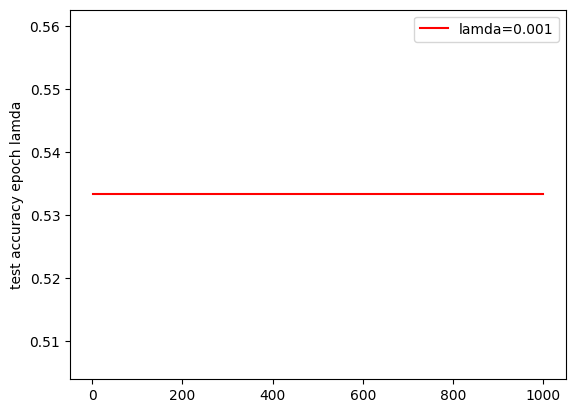

In [52]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, test_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, test_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, test_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, test_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')
# plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [53]:

data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.466667                   0.3

In [54]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
         0.001               0.466667                     0.3


##squared hinge loss (modified stopping criteria)

In [55]:
def OPT1_Sqh(data,label,lamda, tol,num_epochs,test_data,test_label):
  t = 1
  epoch=0
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  g_i_x=1000 
  while np.linalg.norm(g_i_x) > tol and epoch <= num_epochs:
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_Sqh(data,label,w,i,lamda)
      w1=w-step*g_i_x     
      w=compute_orthogonal_projection(w1)                
      t = t+1
      if t>10000:
        t = 1
    epoch+=1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc,epoch


In [56]:
tol=1e-12
num_epochs=1000
lamda = [1]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_Sqh(train_data,train_label,lamda[i], tol,num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(1,values[4])
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(1,values[4])
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(1,values[4])

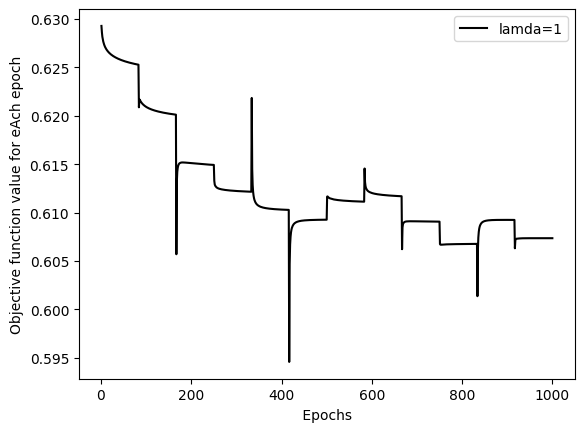

In [57]:
epochs=np.arange(1,values[4],1)
# plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, objval_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, objval_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

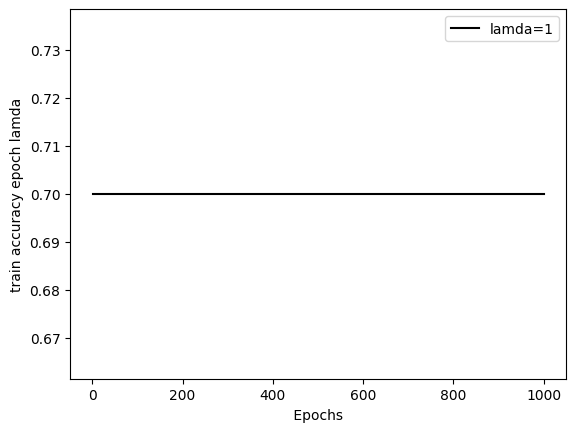

In [58]:
epochs=np.arange(1,values[4],1)
# plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
#plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, train_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, train_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

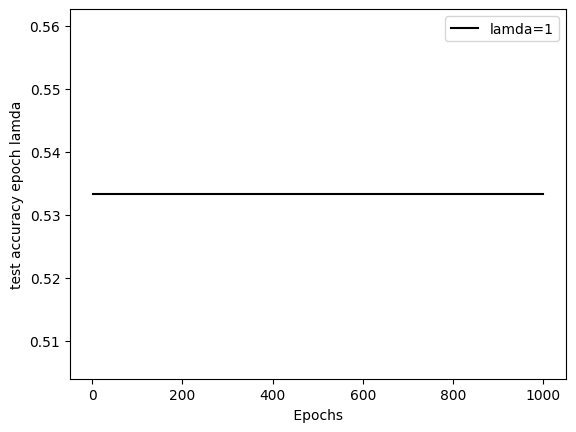

In [59]:
epochs=np.arange(1,values[4],1)
#plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
#plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, test_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, test_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()

plt.show()

In [60]:
import pandas as pd
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [61]:
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])

In [62]:
df

lamda values  final test accuracy  final train accuracy
0             1             0.533333                   0.7

In [63]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
             1               0.533333                     0.7


by modifing our stopping criteria as norm of gradient or sub-gradient less than tolerance value

 i have taken tolerance value as $10^{-12}$ 

 since it does not met in 1000 epoch i.e. norm of gradient or sub gradient is not less than tolerance upto 1000 epoch so it does not make any change in our solution 
 if we take num of epoch larger such that conditioned is fullfill (norm of gradient is less than tolerance) then it make change and that case accuracy is expected more than expected given now 
